# Analysing Outbreaks
This notebook takes in the day the pandemic broke into each town according to simulations as an input and calculates average day to reach town, standard deviation, and plots the frequency (may convert it to probability later)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [21]:
cb = pd.read_csv('/Volumes/HardDrive/New_Workflow/breaks_48/lvl_2.csv', header = None)

In [57]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]

# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
                  (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
                 (waloc['City / Town'] != 'Dampier') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring 0 flow towns
# waloc = waloc.loc[(waloc['City / Town'] != 'Kununurra') & (waloc['City / Town'] != 'Derby') &
#                   (waloc['City / Town'] != 'Boddington-Ranford') & (waloc['City / Town'] != 'Wyndham')]
# waloc = waloc.reset_index()
# waloc = waloc.drop(columns = ['index'])

In [59]:
print("{:30s} {:4.1f}".format("Jacobson, Mark", 19.0))

Jacobson, Mark                 19.0


In [66]:
np.mean([])

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [76]:
ave_breaks = {}
std_breaks = {}
for i in range(48):
    cou = list(cb[i])
    nonan_cou =  [x for x in cou if np.isnan(x) == False]
    ave = np.mean(nonan_cou)
    std = np.std(nonan_cou)
    if np.isnan(ave):
        ave = 1000
        std = 1000
    town = list(waloc.iloc[i])[0]
    ave_breaks[town] = ave
    std_breaks[town] = std
    
sd = {k: v for k, v in sorted(ave_breaks.items(), key=lambda item: item[1])}
print("{:20s} {:>8s} {:>8s}".format('Town',  'Ave. Days', 'StDev'))
for item in sd:
    print("{:20s} {:8.1f} {:8.1f}".format(item,  ave_breaks[item], std_breaks[item]))

Town                 Ave. Days    StDev
Perth                     0.0      0.0
Mandurah                  4.5      2.1
Karratha                 12.1      3.1
Port Hedland             13.2      5.2
Newman                   13.4      4.4
Kalgoorlie-Boulder       13.4      3.7
Northam                  14.8      4.1
Broome                   15.2      3.7
Tom Price                15.6      3.3
Paraburdoo               15.7      3.5
Bunbury                  16.1      2.8
Wickham                  16.6      4.5
Busselton                17.5      3.8
York                     18.1      4.4
Dunsborough              18.9      4.7
Kambalda West            19.0      4.5
Capel                    20.1      3.7
Collie                   20.2      3.9
Donnybrook               21.0      3.2
Harvey                   22.1      3.7
Cowaramup                23.2      2.9
Merredin                 23.4      4.4
Manjimup                 23.7      3.8
Margaret River           25.9      5.0
Geraldton               

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


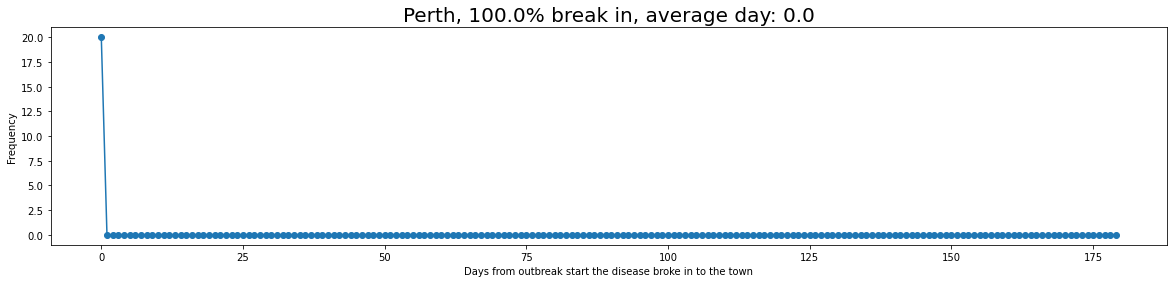

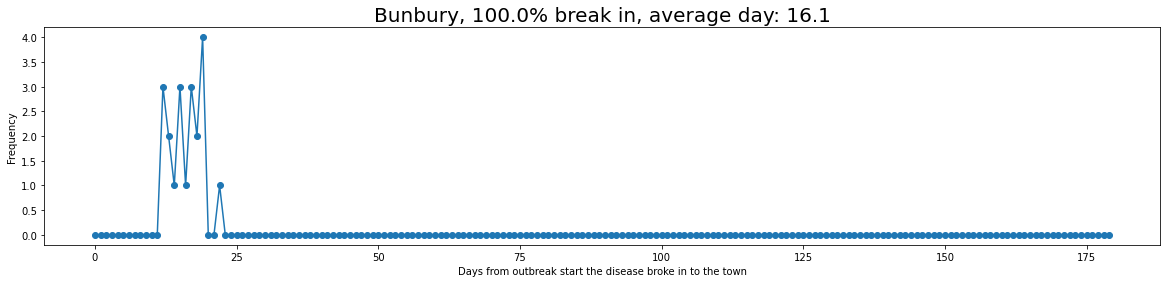

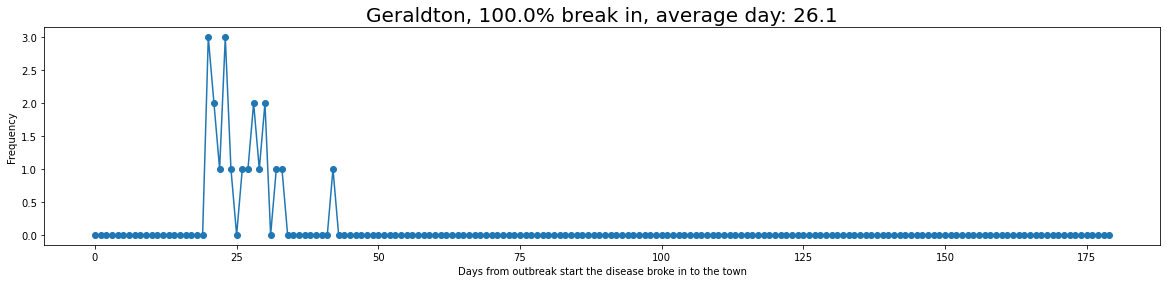

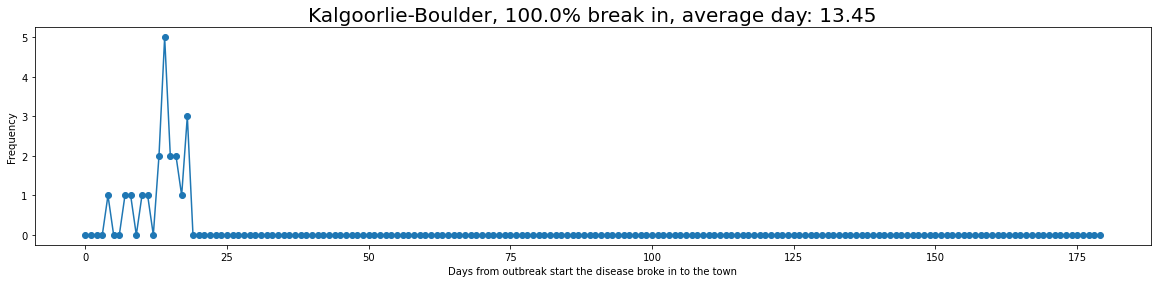

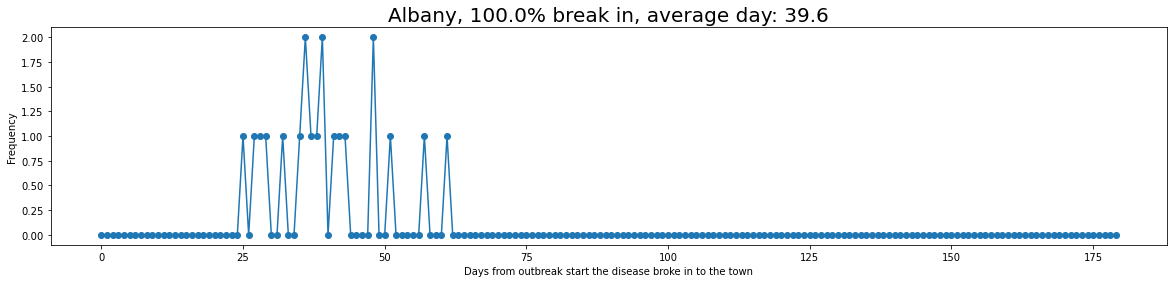

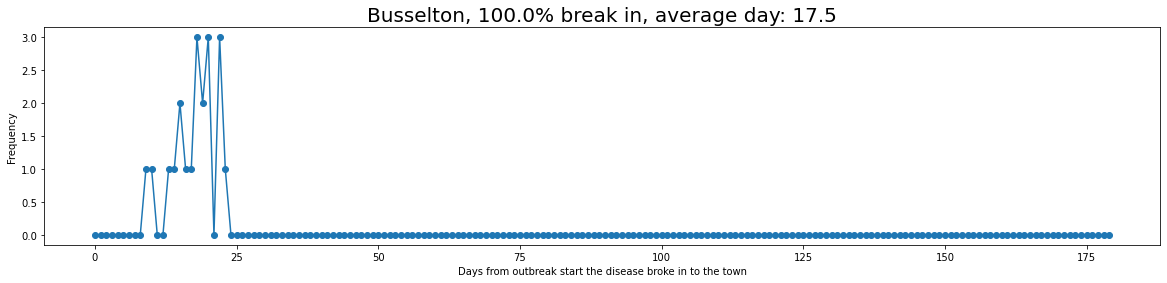

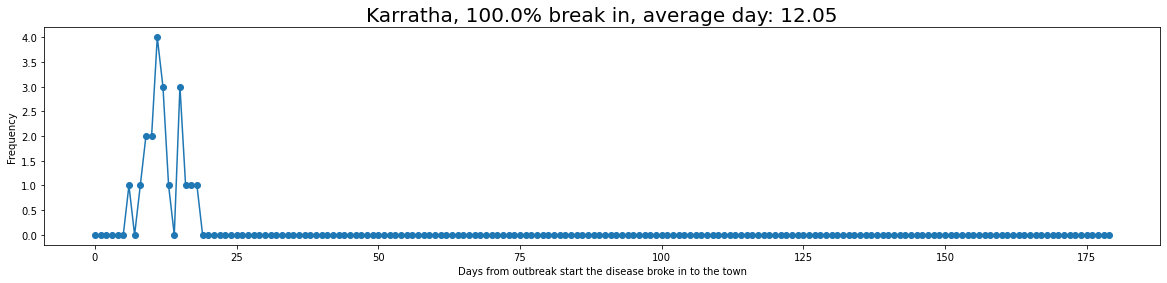

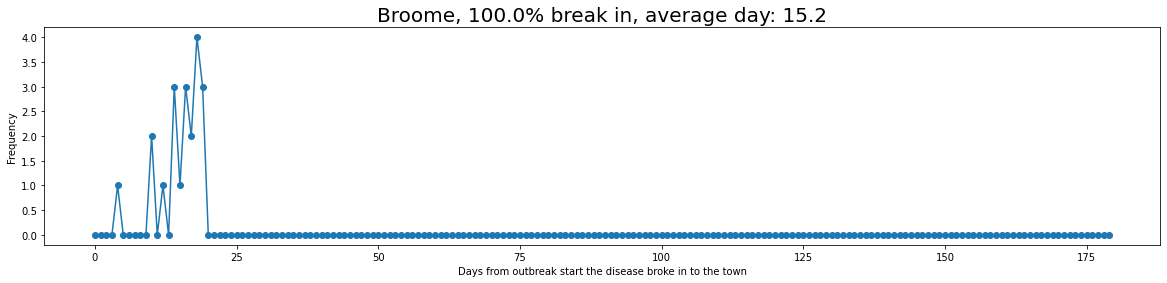

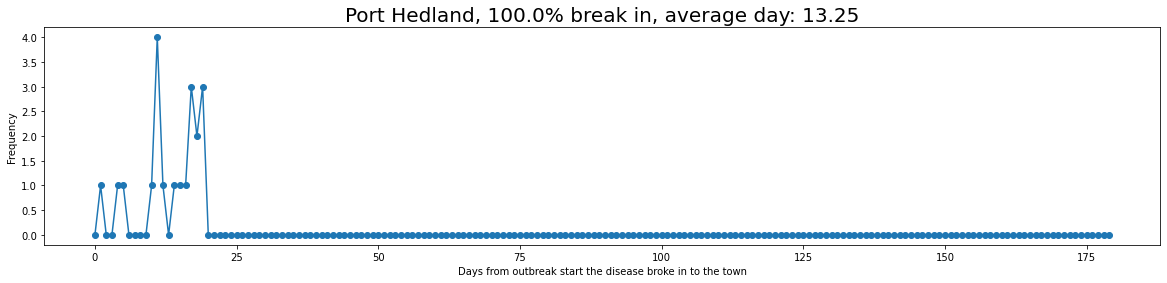

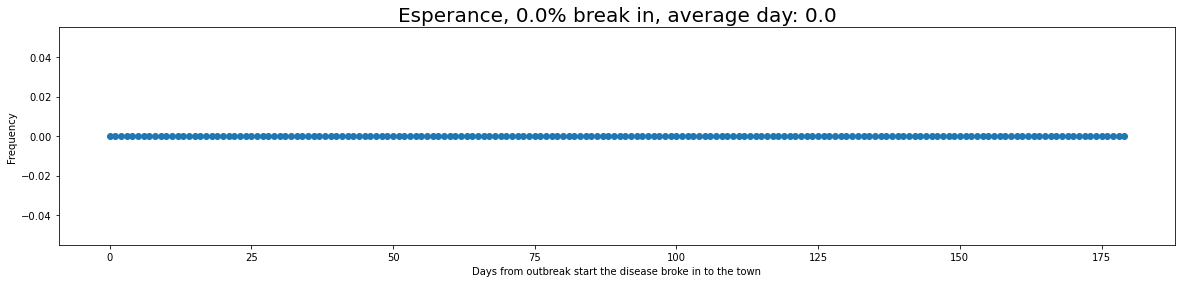

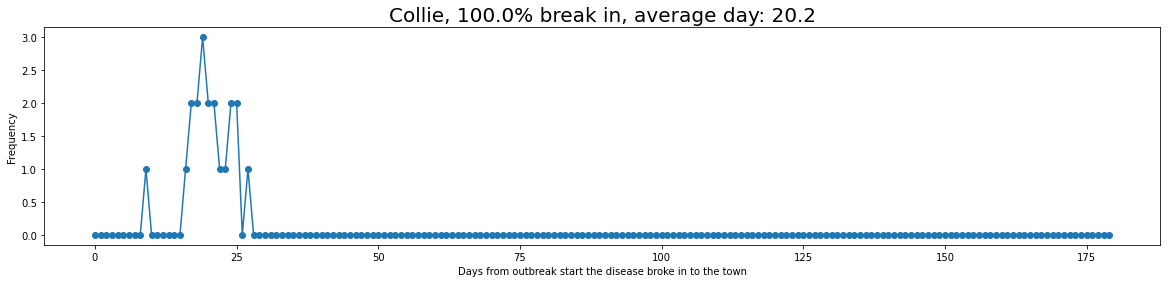

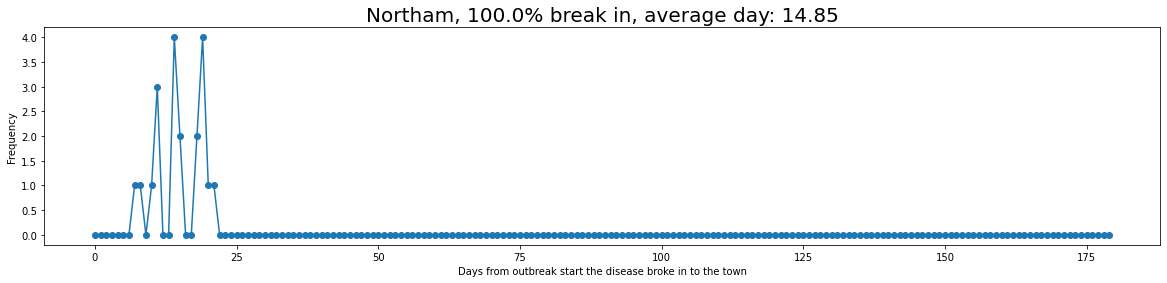

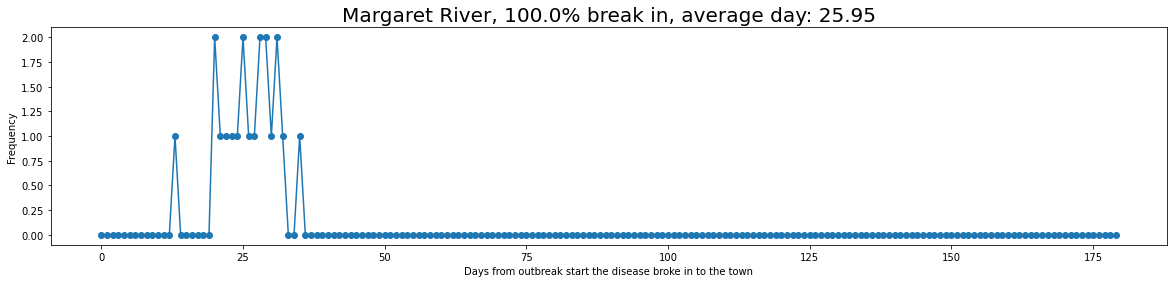

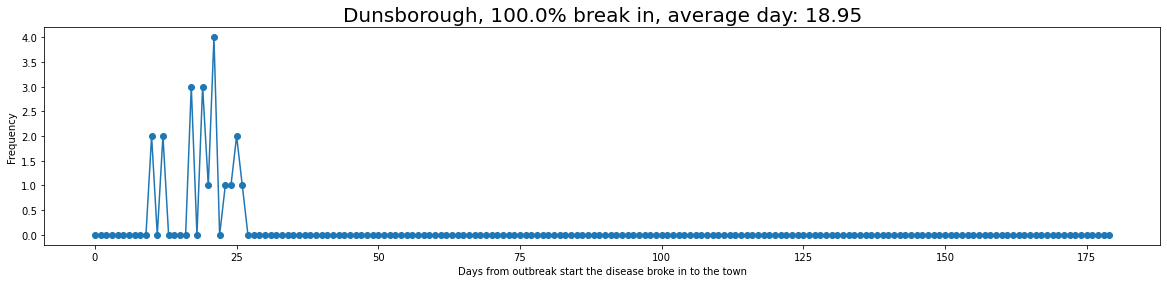

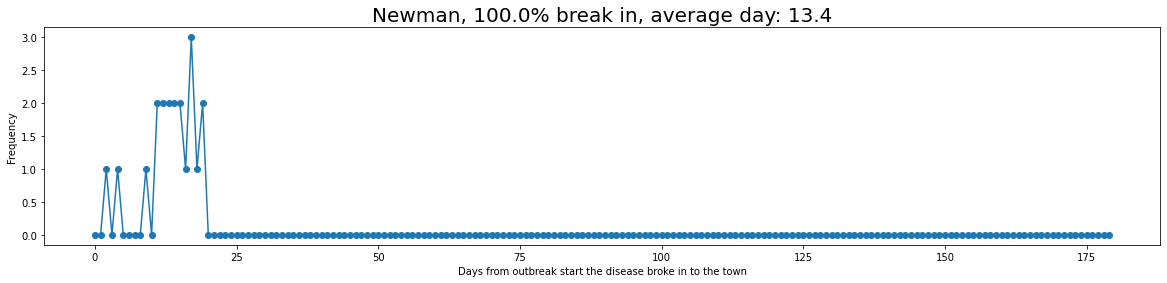

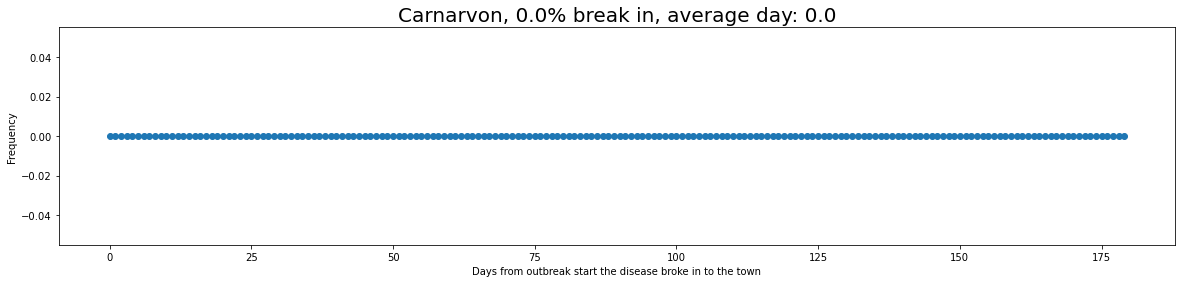

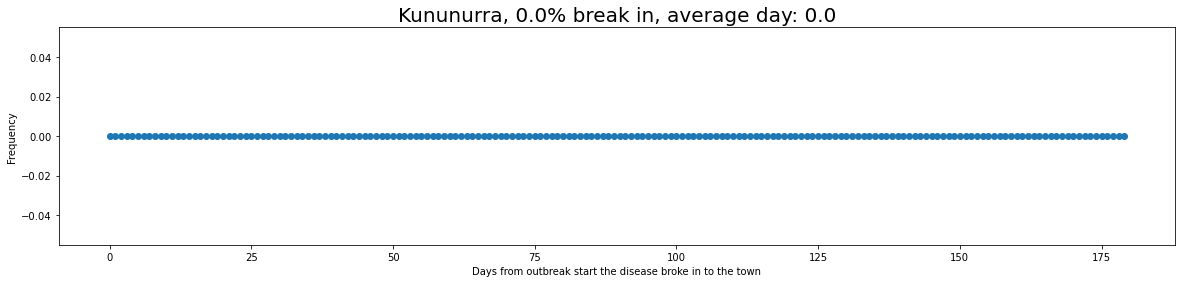

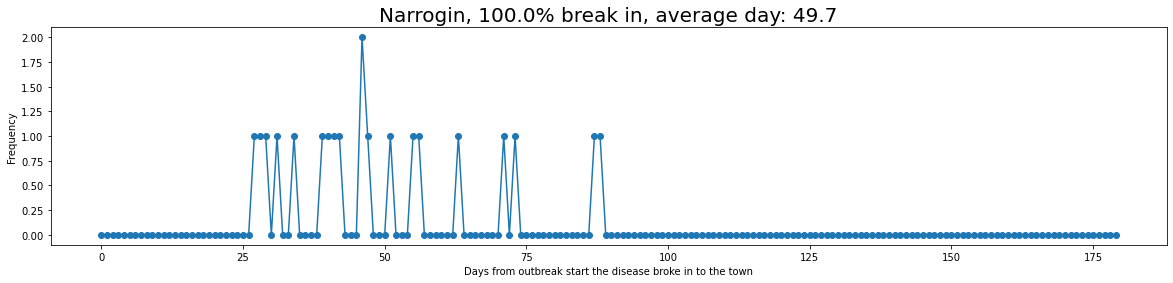

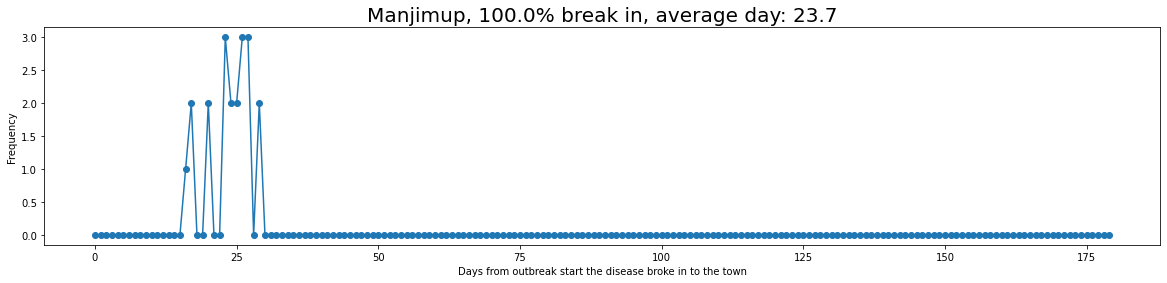

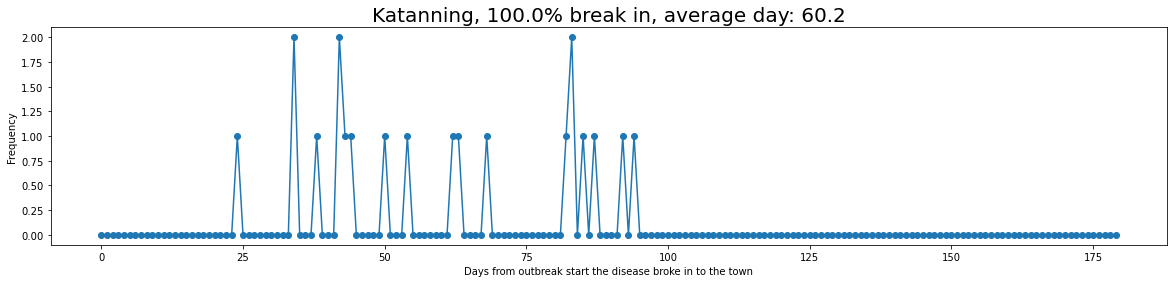

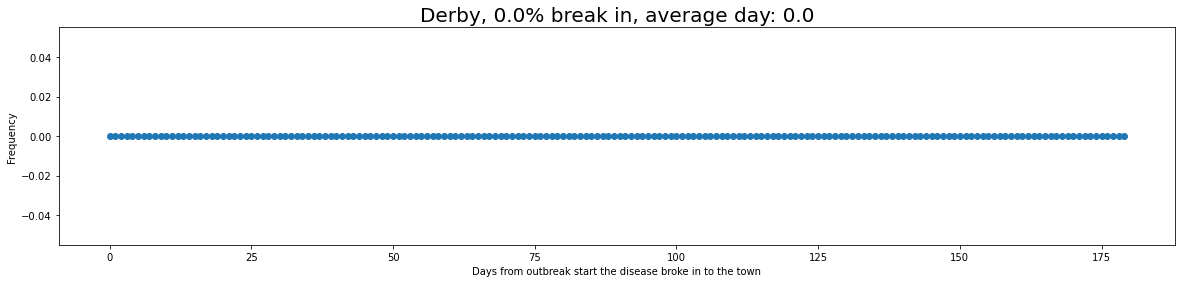

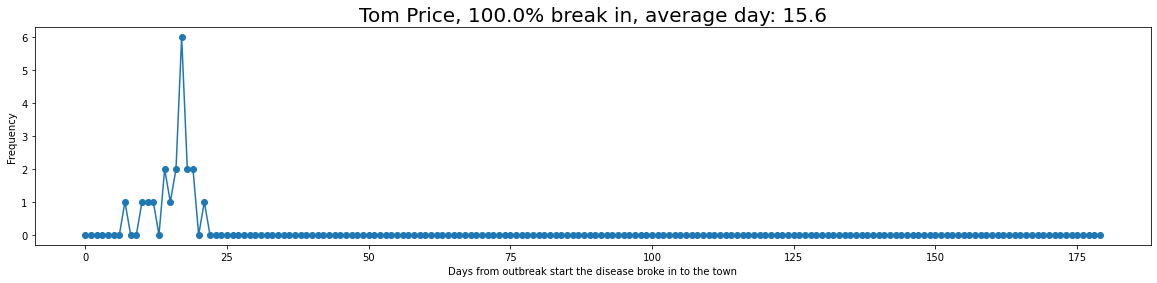

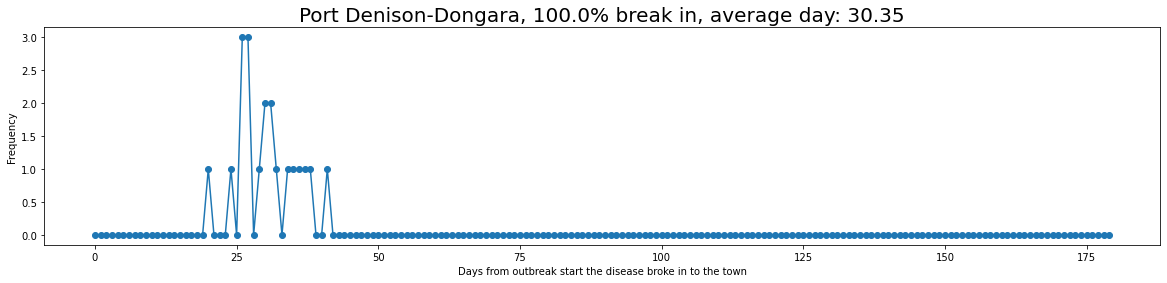

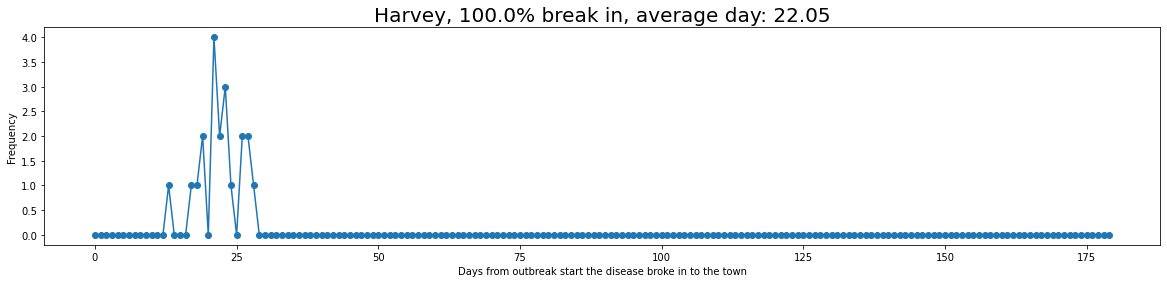

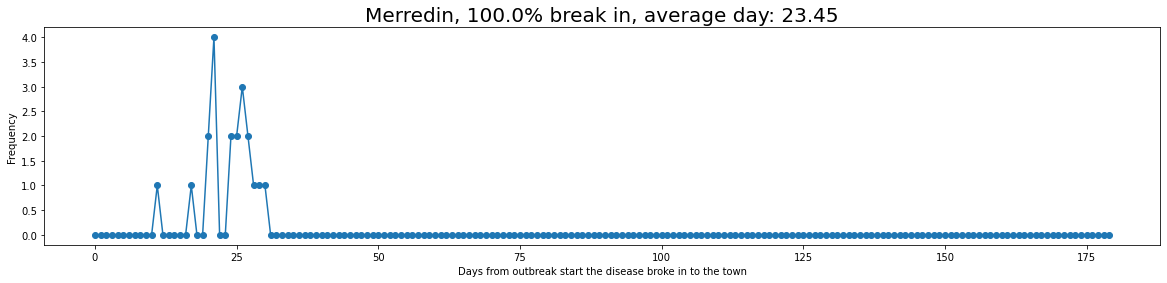

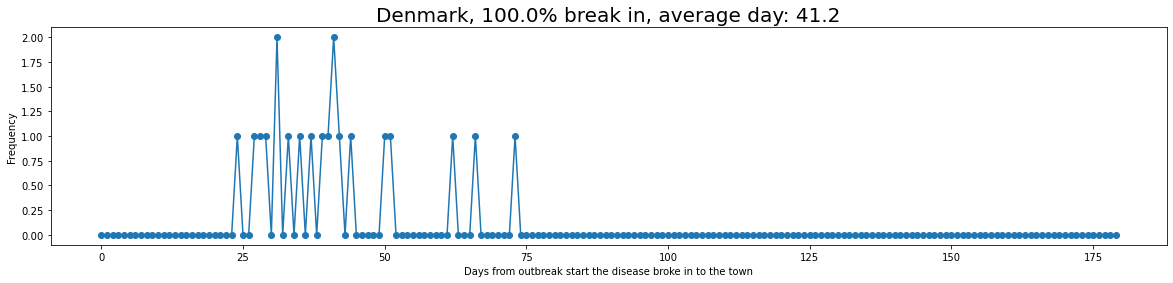

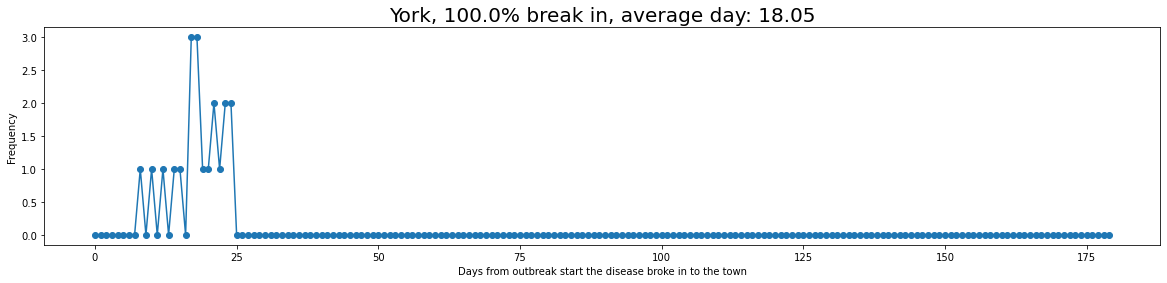

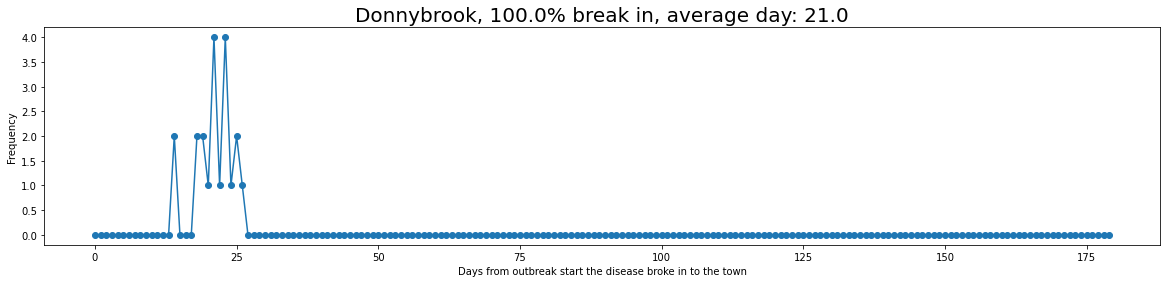

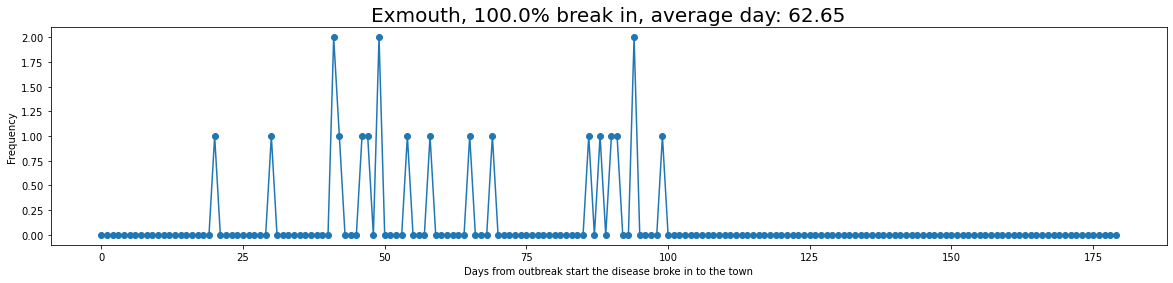

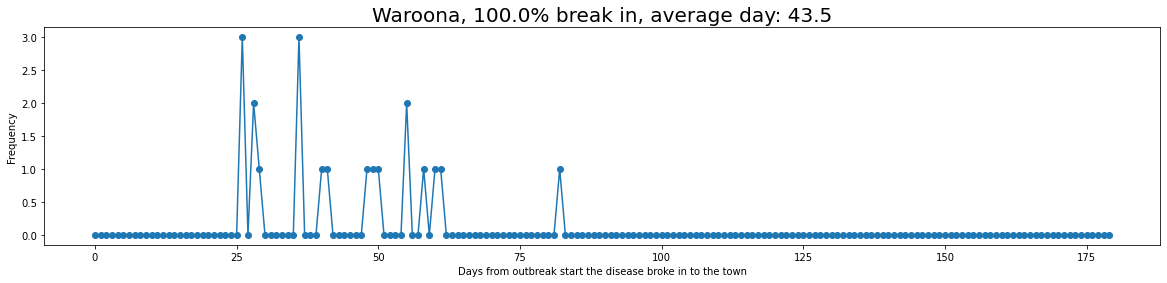

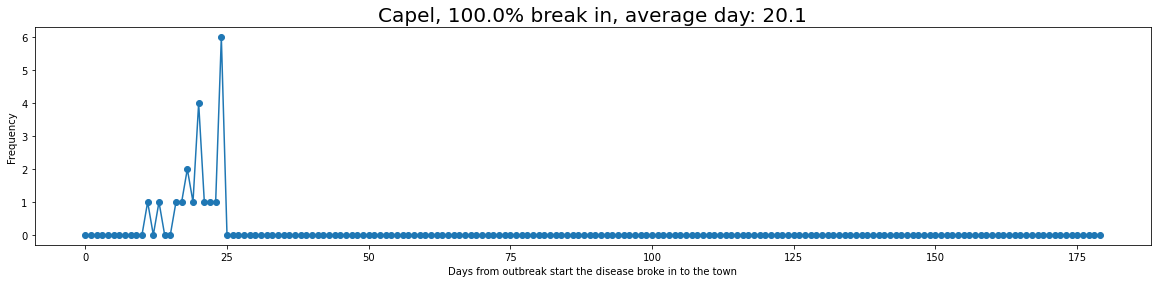

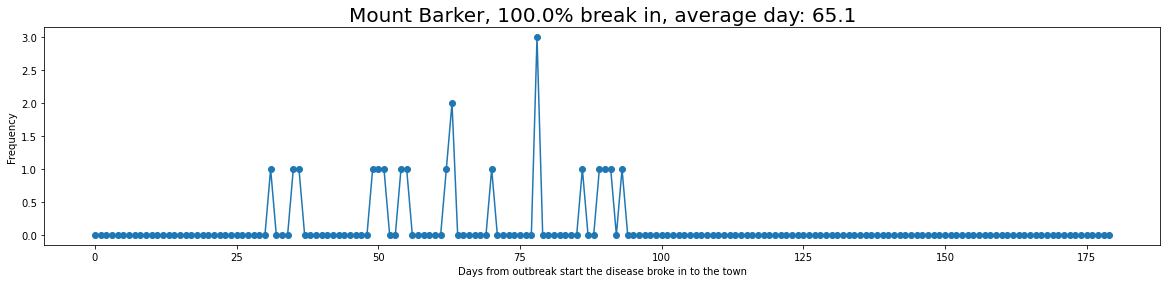

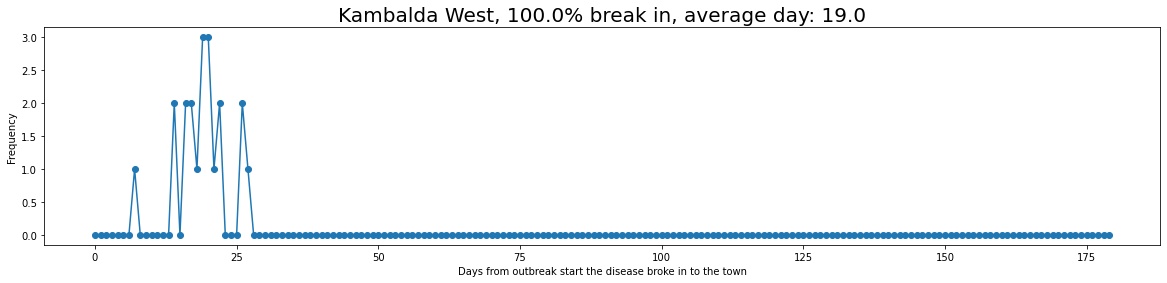

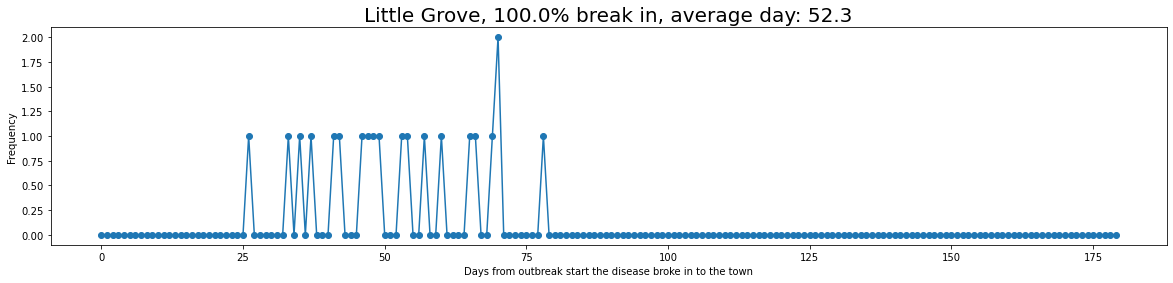

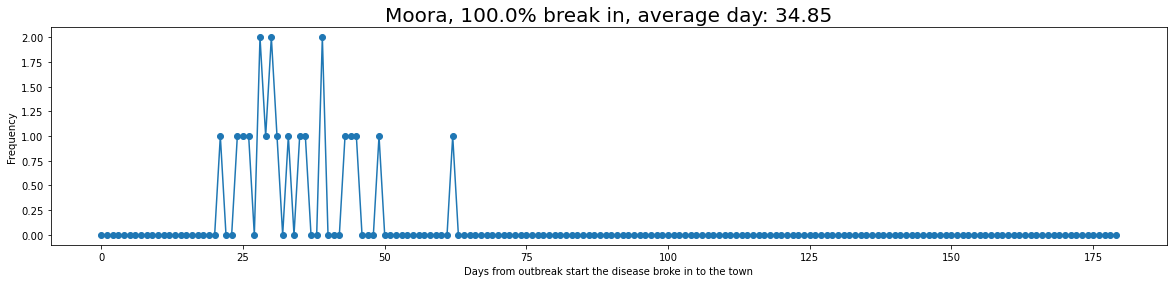

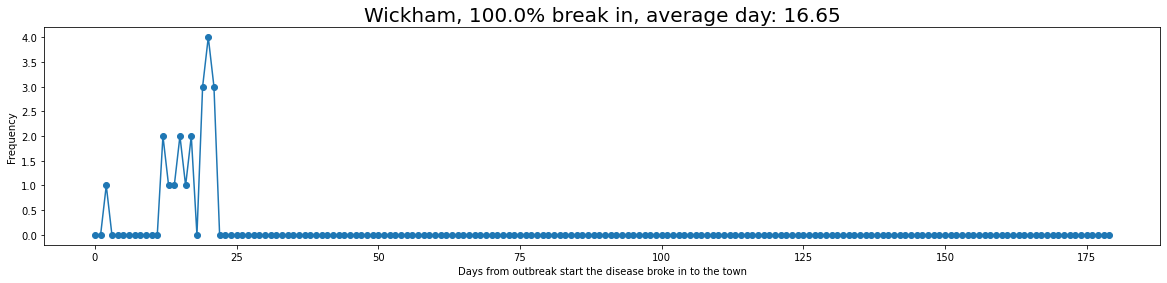

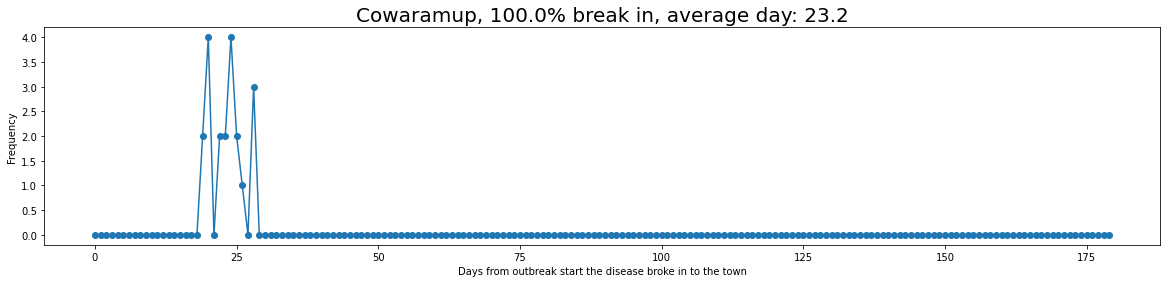

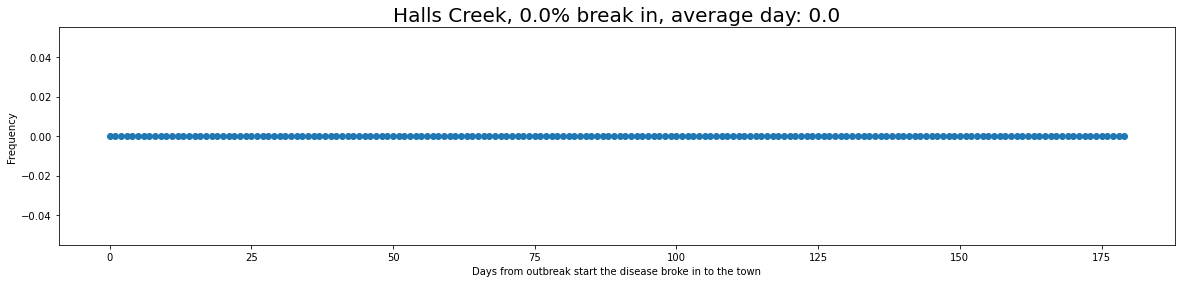

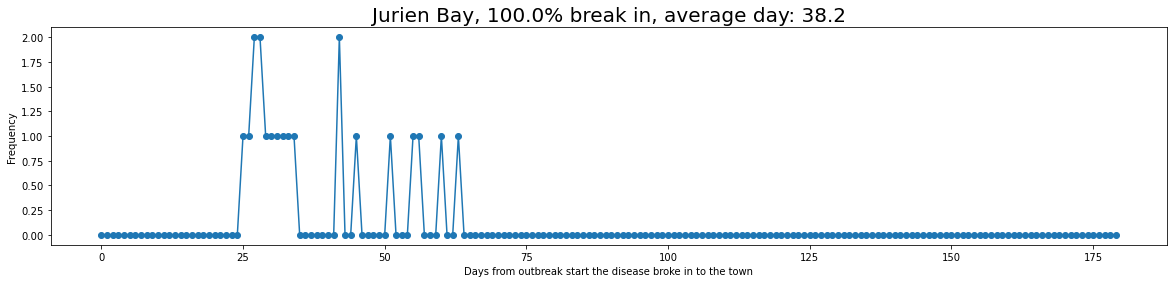

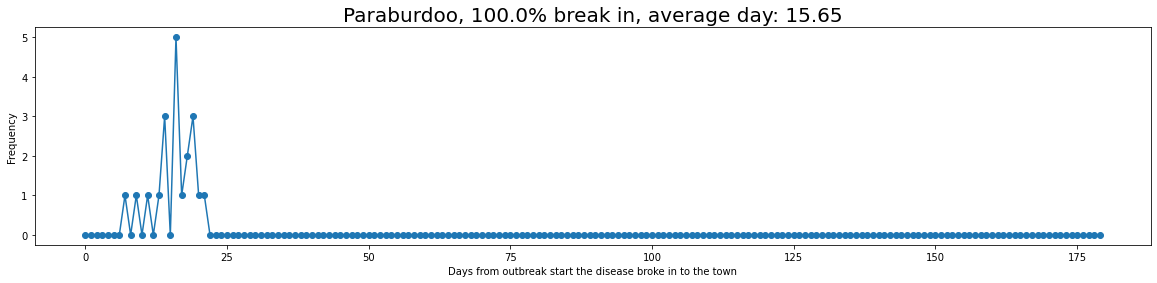

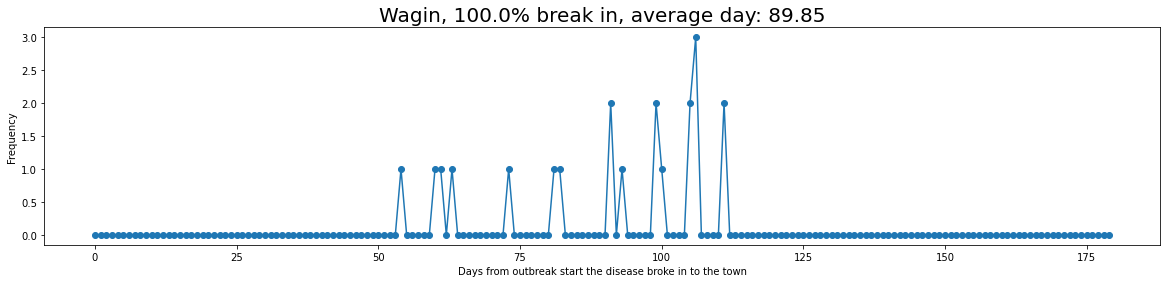

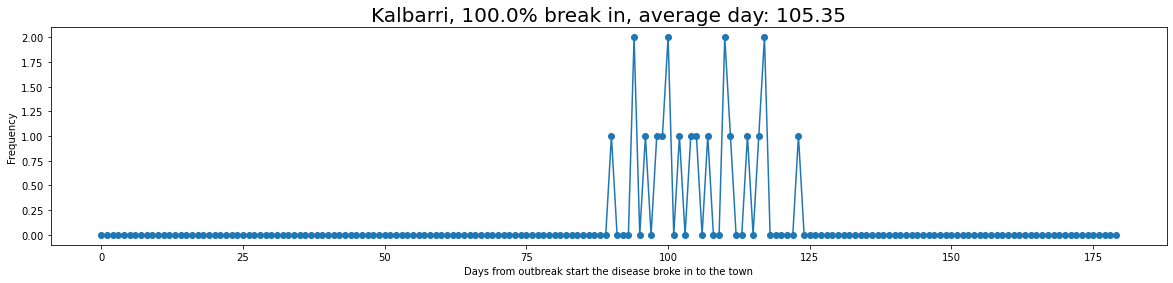

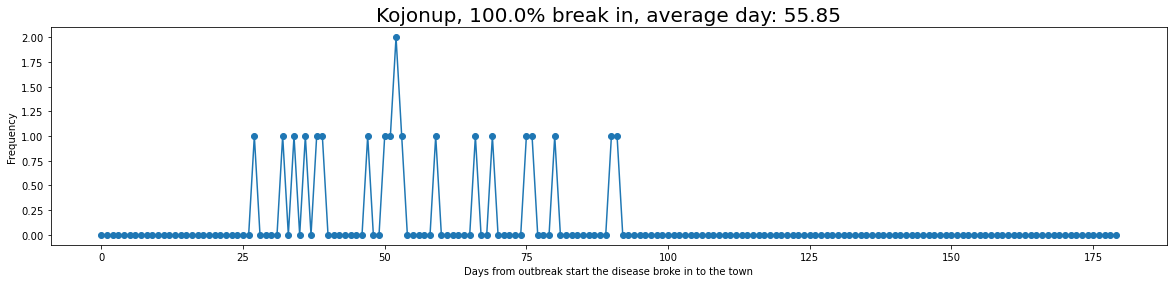

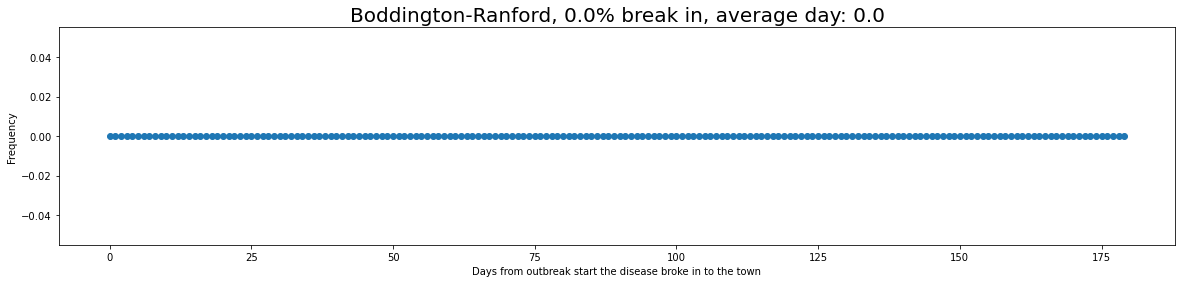

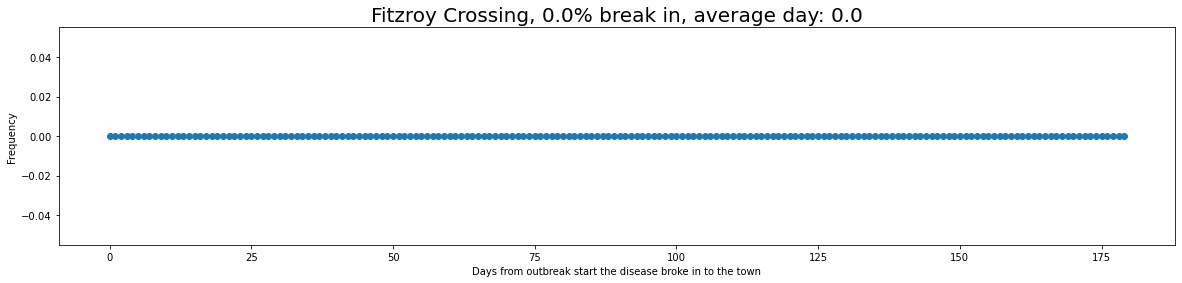

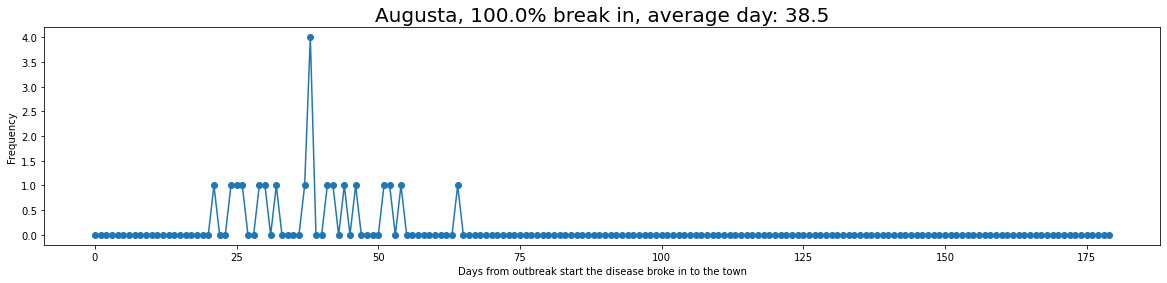

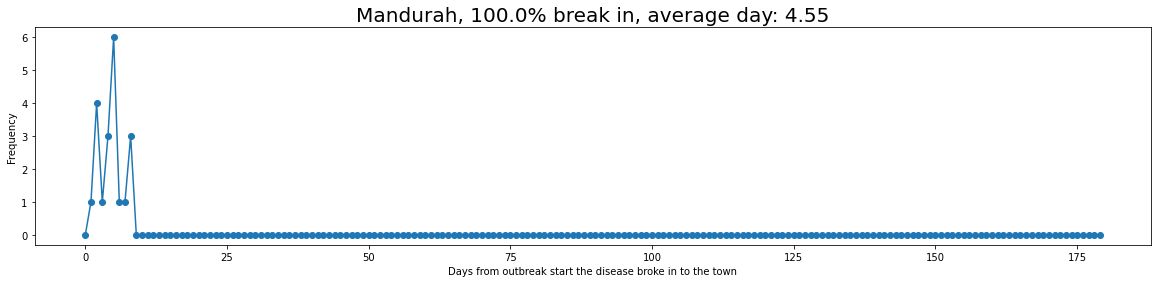

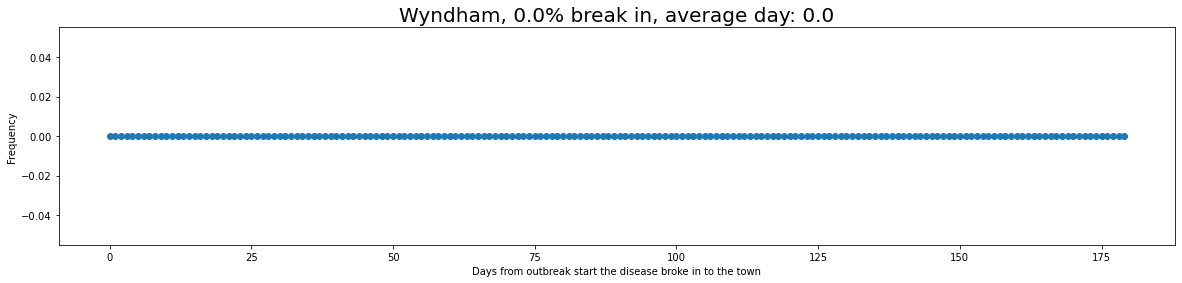

In [77]:
for i in range(48):
    plt.figure(figsize = (20,4))
    tot = []
    cou = Counter(list(cb[i]))
    ave = 0
    for day in range(180):
        tot.append(cou.get(day,0))
        ave += day*cou.get(day,0)
    ave = str(ave/20)
    town = list(waloc.iloc[i])[0]
    breakin = str(sum(tot)/20*100)
    plt.title(town + ', ' + breakin  + '% break in, average day: ' + ave, fontsize = 20)
    plt.plot(tot, marker = 'o')
    plt.xlabel('Days from outbreak start the disease broke in to the town')
    plt.ylabel('Frequency')

# Flow checks

In [41]:
lvl2 = pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions_48/level_2.csv", header = None, sep =',')

In [54]:
st = os.listdir("/Volumes/HardDrive/New_Workflow/48_towns_network")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_48/"+stoch[i], header = None, sep =',')

In [55]:
for j in range(48):
    allup = []
    for i in range(len(stoch)):
        allup.append(sum(list(d[str(i)][j])))
    if sum(allup) == 0:
        print(j, list(waloc.iloc[j])[0])

16 Kununurra
20 Derby
43 Boddington-Ranford
47 Wyndham


In [53]:
d['0'].iloc[9]

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
15    0.000000e+00
16    0.000000e+00
17    0.000000e+00
18    0.000000e+00
19    0.000000e+00
20    0.000000e+00
21    0.000000e+00
22    0.000000e+00
23    0.000000e+00
24    0.000000e+00
25    0.000000e+00
26    0.000000e+00
27    0.000000e+00
28    0.000000e+00
29    0.000000e+00
30    0.000000e+00
31    0.000000e+00
32    1.319952e-07
33    0.000000e+00
34    0.000000e+00
35    0.000000e+00
36    0.000000e+00
37    0.000000e+00
38    0.000000e+00
39    0.000000e+00
40    0.000000e+00
41    0.000000e+00
42    0.000000e+00
43    0.000000e+00
44    0.000000e+00
45    0.000000e+00
46    0.000000e+00
47    0.000000e+00
Name: 9, dtype: float64

In [49]:
for j in range(48):
    allup = sum(list(lvl2[j]))
    #if allup == 0:
    print(j, list(waloc.iloc[j])[0], allup)

0 Perth 1.7707018227380595e-05
1 Bunbury 2.385814232846464e-06
2 Geraldton 2.09351512966991e-07
3 Kalgoorlie-Boulder 1.2102196972370539e-06
4 Albany 7.875727716658171e-07
5 Busselton 2.7440308866685016e-06
6 Karratha 1.3835996400281411e-06
7 Broome 5.624001524445644e-07
8 Port Hedland 9.454724400105547e-07
9 Esperance 8.848698836171695e-09
10 Collie 5.262223280100851e-07
11 Northam 5.751774102187594e-07
12 Margaret River 1.8665768659200014e-07
13 Dunsborough 1.7897238294867156e-06
14 Newman 2.381363517395921e-06
15 Carnarvon 2.6112624967345328e-08
16 Kununurra 0.0
17 Narrogin 9.306535629760636e-08
18 Manjimup 2.5669942982829405e-07
19 Katanning 1.113497409069441e-07
20 Derby 0.0
21 Tom Price 1.1146556494226538e-06
22 Port Denison-Dongara 2.2304546276560286e-07
23 Harvey 3.5827009234684475e-07
24 Merredin 1.0200932217417987e-07
25 Denmark 4.547946421889898e-07
26 York 3.3421836534607536e-07
27 Donnybrook 8.854914130983289e-07
28 Exmouth 8.988296722514908e-09
29 Waroona 9.872789754887681

In [16]:
waloc.iloc[22]

City / Town    Port Denison-Dongara
Population                     2782
long                        114.922
latt                       -29.2339
Name: 22, dtype: object

In [62]:
sum(list(d[str(0)][9]))

0.0

In [22]:
for i in range(48):
    if np.isnan(np.nanmean(cb[i])):
        print(i,list(waloc.iloc[i])[0])

9 Esperance
15 Carnarvon
16 Kununurra
20 Derby
37 Halls Creek
43 Boddington-Ranford
44 Fitzroy Crossing
47 Wyndham


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
